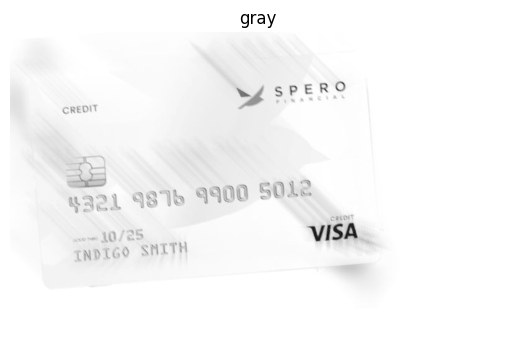

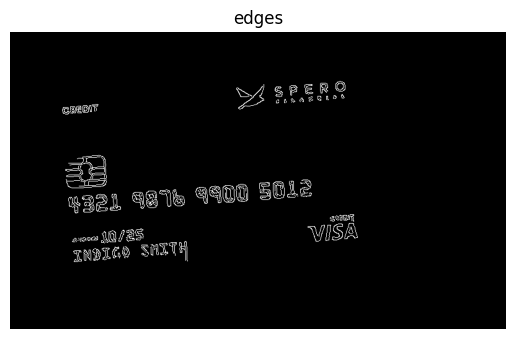

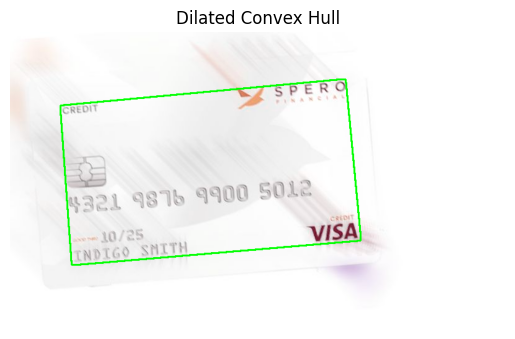

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # Hide axis
    plt.title(name)
    plt.show()

# Load the image
image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
showImage("gray", gray, cmap="gray")

# Detect edges
edges = cv2.Canny(gray, 50, 150)
showImage("edges", edges, cmap="gray")

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Combine all contours into one by concatenating their points
all_contours = np.vstack(contours)

# Compute the convex hull of the combined contours
hull = cv2.convexHull(all_contours)

# Approximate the convex hull to make edges sharper
epsilon = 0.1 * cv2.arcLength(hull, True)
approx = cv2.approxPolyDP(hull, epsilon, True)

# Create a mask for dilation
mask = np.zeros_like(gray)
cv2.drawContours(mask, [approx], -1, 255, thickness=cv2.FILLED)

# Dilate the mask to expand the convex hull
dilated_mask = cv2.dilate(mask, np.ones((10, 10), np.uint8), iterations=1)

# Find contours in the dilated mask
dilated_contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the dilated convex hull on the original image
for contour in dilated_contours:
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Green color with thickness 2

# Display the result
showImage('Dilated Convex Hull', image)
